# Homework 1
## Adam Sanchez 
### MATH 4650

<b> Importing all the Libraries 

In [2]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sym
from sympy import init_printing
init_printing()
import math

<b> Problem 1

In [12]:
x_vals = np.linspace(1.92,2.08,100)
seq1 = (2,2,2,2,2,2,2,2,2)
y=0
coeff = np.poly(seq1)
poly = np.poly1d(coeff)
def MakeAPoly(coeffs, x): 
    n = len(coeffs)
    y=0
    for i in range(n): 
        y += (x**(i+1))*coeffs[1]
    return y
def Horner (x, coeffs):  
    y=coeffs[-1]
    i=len(coeffs)-2
    while i >= 0:
        y = y * x + coeffs[i]
        i -= 1
    return y

i = MakeAPoly(coeff, x_vals)
ii = (x_vals-2)**9
iii = Horner(x_vals, coeff)
iv = np.polyval(poly,x_vals)

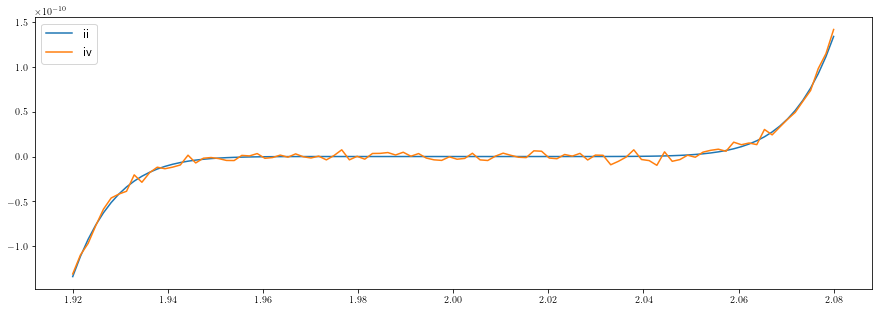

In [13]:
plt.figure(figsize = (15,5))
plt.plot(x_vals, ii, x_vals, iv)
plt.legend(['ii', 'iv'], fontsize = 13)

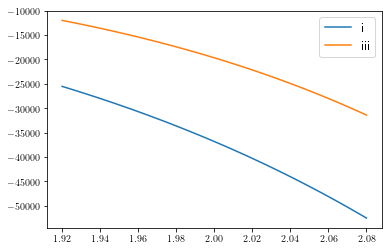

In [85]:
plt.plot(x_vals, i, x_vals, iii)
plt.legend(['i', 'iii'], fontsize = 13)

<b> b) Im not sure whats going on here. I know you asked to graph all 4 on the same plot but I can't figure out whats going on with my fuctions for i and iii. My only thought is that I am getting awful rounding errors. Clearly I think ii or iv are the most accurate. 

--------------------------------------------------------------------------------------------------------------------

<b> Problem 2 <b> 
    
a) In this problem we would run into issues with underflow when x is very close to 0 (any decimal with more than approximatly 15 digits). So I think the best way to evaluate it is with the Taylor Series of the function. The first few terms of the Taylor series of this function are: 
$$ \frac12x - \frac18x^2 +\frac1{16}x^3$$ we can see that we will not get cancellation now. 

b) Again we would run into the same issues so we should try and change the equation. Note that $$\sin{2a} = 2\sin{a}\cos{a} $$ Thus our equation turns into: $$2\sin{(x+a)}\cos{a+x}-2\sin{a}\cos{a} = 2\left(\sin{a}\cos{x}+
\cos{a}\sin{x}\right)-2\sin{a}\cos{a}$$ which wouldn't be an issue. 

--------------------------------------------------------------------------------------------------------------------

<b> Problem 3

Text(0.5,1,'Both have log scaling')

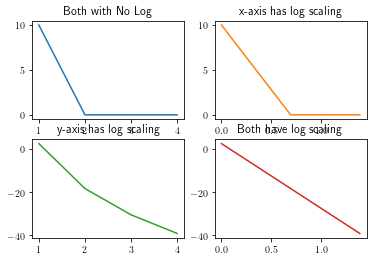

In [131]:
# 3a) Based on the plots bellow we should use a plot where both axes are logarithmicly scaled. 
C = 10
a = 30

x = np.linspace(1,4,4)
xlog = np.log(x)
xn = (1/(x**a))*C
xnlog = np.log(xn)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, xn)
axs[0, 0].set_title('Both with No Log')
axs[0, 1].plot(xlog, xn, 'tab:orange')
axs[0, 1].set_title('x-axis has log scaling')
axs[1, 0].plot(x, xnlog, 'tab:green')
axs[1, 0].set_title('y-axis has log scaling')
axs[1, 1].plot(xlog, xnlog, 'tab:red')
axs[1, 1].set_title('Both have log scaling')

Text(0.5,1,'Both have log scaling')

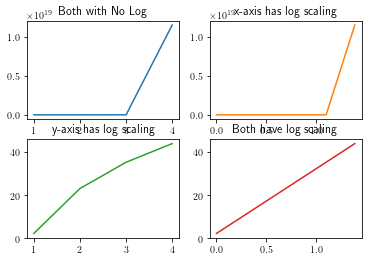

In [135]:
# 3b) Based on the plots bellow we should use a plot where both axes are logarithmicly scaled. 
D = 10 
p = 30

x = np.linspace(1,4,4)
xlog = np.log(x)
xn = C*x**p
xnlog = np.log(xn)
xntry = C*xlog**p
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, xn)
axs[0, 0].set_title('Both with No Log')
axs[0, 1].plot(xlog, xn, 'tab:orange')
axs[0, 1].set_title('x-axis has log scaling')
axs[1, 0].plot(x, xnlog, 'tab:green')
axs[1, 0].set_title('y-axis has log scaling')
axs[1, 1].plot(xlog, xnlog, 'tab:red')
axs[1, 1].set_title('Both have log scaling')

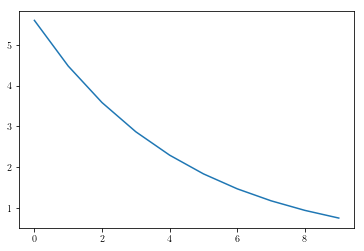

In [137]:
# 3c) 
b = [5.6000, 4.4800, 3.5840, 2.8672, 2.2938, 1.8350, 1.4680, 1.1744, 0.9395, 0.7516]
plt.plot(b)
#based on the plot I would guess that the sequence converges superlinearly 
#This has the form Dp^(n) where D=5.6 and p = .8

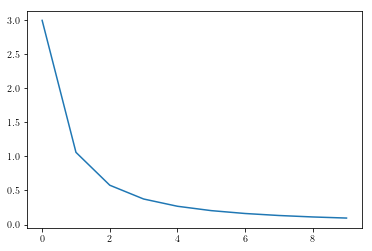

In [3]:
##3d)
q=[3.0000, 1.0607, 0.5774, 0.3750, 0.2683, 0.2041, 0.1620, 0.1326, 0.1111, 0.0949]
plt.plot(q)
#Based on the plot I would guess that the sequence converges quadratically
#I dont think this has the form of either?

--------------------------------------------------------------------------------------------------------------------

<b> Problem 4
    
For this problem we should look at the at the Maclaurin series:
$$ \frac{1}{1-h} - x -1 = 0 + \frac{\frac{d}{dx}\left(\frac{1}{1-h}-h-1\right)(0)}{1!}x + \frac{\frac{d}{dx}\left(\frac{1}{1-h}-h-1\right)(0)}{2!}x^2 + ...$$


$$=0 +\frac{0}{1!}x+\frac{2}{2!}x^2+\frac{6}{3!}x^3+\frac{24}{4!}x^4+...$$

$$= x^2+x^3+x^4+x^5+...$$

$$= x^2+O(x^3)$$

--------------------------------------------------------------------------------------------------------------------

<b> Problem 5

a) $$ K_{f}(x) = \left|\frac{x}{e^{x}-1}e^x\right|$$ f(x) appears to be well conditioned for all x

b) $$ g(x) = e^x \rightarrow K_{g}{x} = |x|$$
$$K_{g}(x) < K_{f}(x)$$
$$ h(x) = x-1 \rightarrow K_{h}(x) = \left|\frac{x}{x-1}\right|$$
$$ K_{h}(x) > K_{f}(x)$$ 

So the algorthim is unstable. 

c) As we can see from the code below the algorthim gives us 8 correct digits. This is expected because we know that the algorthim is not stable even though the function is well conditioned 

In [6]:
x = 9.999999995000000*10**(-10)
kf= (x*math.exp(x))/(math.exp(x)-1)

def j(h): 
    y = math.exp(h)
    return y-1
j(x)

1.000000082740371e-09

<b> d) First lets find the taylor expansion

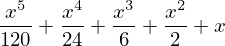

In [31]:
x = sym.Symbol('x')

Taylor = sym.series( sym.exp(x)-1, x )
Taylor.removeO()

<b> $$K_f(x) = \left|\frac{x\left(\frac{x^4}{24}+\frac{x^3}{6}+\frac{x^2}{2}+1\right)}{\frac{x^5}{120}+\frac{x^4}{24}+\frac{x^3}{6}+\frac{x^2}{2}+x}\right| = \left|\frac{5x^4+20x^3+60x^2+120}{x^4+5x^3+20x^2+60x+120}\right|$$

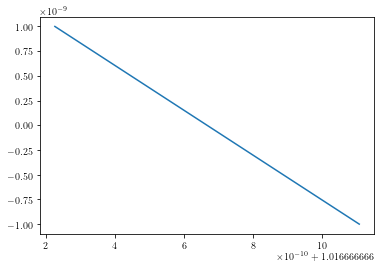

In [10]:
#Lets plot K for -10^(-9)<=x<=10^9
x_vals = np.linspace(-10**(-9),10**(-9),100)
k = ((5*x_vals**4)+(20*x_vals**3)+(60**x_vals*2)+120)/((x_vals**4)+(5*x_vals**3)+(20*x_vals**2)+(60*x_vals)+120)
plt.plot(k,x_vals)

<b> notice that we sould have accuracy for about 30 digits

<b> e)

In [33]:
guess = Taylor.removeO().subs(x,9.999999995000000*10**(-10)).evalf()
print("My guess is:", guess)

My guess is: 1.00000000000000e-9


<b> so we are accurate to atleast 16 digits 